**AI FINAL - 810196684**


در این پروژه قصد داریم آگهی های فروش تلفن همراه را بر اساس ویژگی های آن ها مانند عنوان، توضیحات، برند، تعداد عکس های آگهی، شهری که آگهی در آن ثبت شده و  تاریخ ثبت، قیمت تلفن همراه را تخمین بزنیم.
چون داده های پروژه به ما داده شده است، از مرحله جمع آوری داده گذر میکنیم.

In [ ]:
!pip install hazm

In [ ]:
!pip install setuptools wheel numpy scipy scikit-learn -U

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (49.2.0)
Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.34.2)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.1)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.5.2)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


In [ ]:
!unzip -n "/content/drive/My Drive/AI_FINAL/mobile_phone_dataset.zip"

Archive:  /content/drive/My Drive/AI_FINAL/mobile_phone_dataset.zip


داده را لود کرده و بخشی از آن را نمایش می دهیم تا اطلاعاتی که داریم را بدانیم.
سپس چک میکنیم که در داده nan نداشته باشیم.
و همچنین نوع داده ی هر ستون را نیز نمایش میدهیم تا در صورت نیاز، آن را به فرمت دیگری تبدیل کنیم.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/mobile_phone_dataset.csv")
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data

,brand,city,title,desc,image_count,created_at,price
0,Nokia::نوکیا,Qom,نوکیا6303,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,2,Wednesday 07AM,60000
1,Apple::اپل,Tehran,ایفون ٥اس٣٢گیگ,درحد نو سالم اصلى بدون ضربه مهلت تست میدم,0,Wednesday 11AM,1150000
2,Samsung::سامسونگ,Mashhad,سامسونگ j5,گوشى بسیار بسیار تمیز و فقط سه هفته کارکرده و ...,2,Wednesday 02PM,590000
3,Apple::اپل,Karaj,گرى 5s ایفون 32گیگ,گلس پشت و رو .کارت اپل ای دی. لوازم جانبی اصلی...,3,Wednesday 04PM,1100000
4,Samsung::سامسونگ,Tehran,galaxy S5 Gold در حد آک,کاملا تمیز و بدون حتی 1 خط و خش\nبه همراه گلاس...,2,Friday 01PM,900000
...,...,...,...,...,...,...,...
59184,Apple::اپل,Tehran,گوشی موبایل ایفون(4S (32GB,گوشی موبایل ایفون 4S\n32 گیگ سفید سالم دکمه هو...,3,Tuesday 03PM,500000
59185,LG::ال‌جی,Mashhad,گوشی ال جی k10تمیزومرتب بدون خط وخش,گوشی ال جی سالم وبدون کوچکترین ایرادوبدون خط و...,3,Tuesday 05PM,520000
59186,Apple::اپل,Tehran,/١٦gig/5s/گلد,جعبه ولوازم LLAاصل/بدون خط وخش/باز نشده/سالم.,2,Wednesday 11AM,720000
59187,Samsung::سامسونگ,Tehran,گلکسی galaxy s4 i9500,سالم و تمیز با لوازم\nاندروید 5. باتری اورجینا...,2,Thursday 09AM,475000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59189 entries, 0 to 59188
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        59189 non-null  object
 1   city         59189 non-null  object
 2   title        59189 non-null  object
 3   desc         59189 non-null  object
 4   image_count  59189 non-null  int64 
 5   created_at   59189 non-null  object
 6   price        59189 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.2+ MB


In [ ]:
data.isnull().any()

brand          False
city           False
title          False
desc           False
image_count    False
created_at     False
price          False
dtype: bool

In [ ]:
data.dtypes

brand          object
city           object
title          object
desc           object
image_count     int64
created_at     object
price           int64
dtype: object

در این پروژه، داده های تست که باید توسط ما قیمتشان تخمین زده شود، در ابتدا دارای قیمت -1 هستند. بنابراین آن ها را پیدا میکنیم و از داده های آموزش جدا میکنیم.

In [ ]:
testData = data[data['price'] == -1]
testData

,brand,city,title,desc,image_count,created_at,price
23,Samsung::سامسونگ,Karaj,A3 2015,گوشی در حده نو کلا 2 هفتس خریدمش.با تشکر از سا...,1,Tuesday 12PM,-1
28,Apple::اپل,Qom,اپل 5s ٣٢ گیگ بسیار تمیز در حد,گوشی بسیار تمیز در حد قیمت مقطوع میباشد لطفا ت...,2,Saturday 04AM,-1
32,Apple::اپل,Shiraz,اقساط٢٤ماهه بدون پیش پرداخت,اقساط ٢٤ماهه بدون پیش پرداخت,0,Sunday 03PM,-1
36,Sony::سونی,Qom,سونی مدل acro s گوشی هواوی y300,"گوشی سونی مدل acro s دوربین 12 فیلمبرداری HD ,...",2,Thursday 06AM,-1
44,HTC::اچ‌تی‌سی,Tehran,ّگوشی موبایل htc desire610 جهت معاوضه,معاوضه با ایفون 4\nگوشیم سالم سالم 4g\nبدون هی...,0,Monday 08PM,-1
...,...,...,...,...,...,...,...
59121,Lenovo::لنوو,Karaj,گوشی موبایل HuaweiG610,دست دوم خیلی نو فقط هارد گوشی سوخته باید تعمیر...,3,Tuesday 11AM,-1
59146,Samsung::سامسونگ,Karaj,گوشی سامسونگ گلکسی مینی اندروید,گوشی سامسونگ گلکسی مینی اندروید\nتمیز \nدر حد نو,3,Wednesday 01PM,-1
59169,Apple::اپل,Shiraz,iPhone SE 16GB / RoseGold,آیفون فوق بسیار تمیز و در حد نو می‌باشد(بدون ه...,4,Sunday 12PM,-1
59174,Samsung::سامسونگ,Mashhad,نوت 5گلدتک سیم درحدمعاوضه فقط با 5sیا6s,در حد اک ۳۲گیگ معاوضه فقط با اپل ۵اس یا ۶اس ۶۴...,0,Tuesday 10AM,-1


In [ ]:
data = data.drop(testData.index)
data

,brand,city,title,desc,image_count,created_at,price
0,Nokia::نوکیا,Qom,نوکیا6303,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,2,Wednesday 07AM,60000
1,Apple::اپل,Tehran,ایفون ٥اس٣٢گیگ,درحد نو سالم اصلى بدون ضربه مهلت تست میدم,0,Wednesday 11AM,1150000
2,Samsung::سامسونگ,Mashhad,سامسونگ j5,گوشى بسیار بسیار تمیز و فقط سه هفته کارکرده و ...,2,Wednesday 02PM,590000
3,Apple::اپل,Karaj,گرى 5s ایفون 32گیگ,گلس پشت و رو .کارت اپل ای دی. لوازم جانبی اصلی...,3,Wednesday 04PM,1100000
4,Samsung::سامسونگ,Tehran,galaxy S5 Gold در حد آک,کاملا تمیز و بدون حتی 1 خط و خش\nبه همراه گلاس...,2,Friday 01PM,900000
...,...,...,...,...,...,...,...
59184,Apple::اپل,Tehran,گوشی موبایل ایفون(4S (32GB,گوشی موبایل ایفون 4S\n32 گیگ سفید سالم دکمه هو...,3,Tuesday 03PM,500000
59185,LG::ال‌جی,Mashhad,گوشی ال جی k10تمیزومرتب بدون خط وخش,گوشی ال جی سالم وبدون کوچکترین ایرادوبدون خط و...,3,Tuesday 05PM,520000
59186,Apple::اپل,Tehran,/١٦gig/5s/گلد,جعبه ولوازم LLAاصل/بدون خط وخش/باز نشده/سالم.,2,Wednesday 11AM,720000
59187,Samsung::سامسونگ,Tehran,گلکسی galaxy s4 i9500,سالم و تمیز با لوازم\nاندروید 5. باتری اورجینا...,2,Thursday 09AM,475000


حال میخواهیم مرحله تصویرسازی داده را آغاز کنیم. در ابتدا برای هر ستون، توضیحات مختصری از آن شامل تعداد مقادیر منحصر به فردی که در آن قرار دارد، مقداری که بالاترین تکرار را در این ستون دارد و تعداد تکرار های آن و نوع داده را نشان میدهیم.

با توجه به توضیحات زیر، 9 تا برند داریم و حدود 33 درصد آگهی ها، مربوط به فروش تلفنی با مارک سامسونگ هستند. و بیشترین تکرار را در میان برندها دارد.

In [ ]:
data.brand.describe()

count                53301
unique                   9
top       Samsung::سامسونگ
freq                 18048
Name: brand, dtype: object

جالب است ببینیم که در میان عنوان های آگهی ها، حدود 22 درصد آن ها عنوان منحصر به فردی ندارند. همچنین بیشترین تکرار عنوان، "گوشی سامسونگ"است.

In [ ]:
data.title.describe()

count            53301
unique           41255
top       گوشی سامسونگ
freq               122
Name: title, dtype: object

جالب است ببینیم که در میان توضیحات های آگهی ها، حدود 2 درصد آن ها عنوان منحصر به فردی ندارند. همچنین بیشترین تکرار عنوان، "بسیار تمیز"است"

In [ ]:
data.desc.describe()

count          53301
unique         52436
top       بسیار تمیز
freq              40
Name: desc, dtype: object

همان طور که دیده میشود 9 تا شهر داریم که پر تکرار ترین آن ها تهران است

In [ ]:
data.city.describe()

count      53301
unique         9
top       Tehran
freq       19644
Name: city, dtype: object

مقادیر بیشینه و کمینه و همچنین درصد تکرار برای 25% و 50% و 75% داده ها نشان داده شده است.

In [ ]:
data.image_count.describe()

count    53301.000000
mean         1.671451
std          1.371914
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: image_count, dtype: float64

برای تاریخ ثبت آگهی، 168 روز و ساعت متفاوت داریم که پرتکرار ترین میان آن ها، یک شنبه 5 عصر است.

In [ ]:
data.created_at.describe()

count           53301
unique            168
top       Sunday 05PM
freq              547
Name: created_at, dtype: object

برای قیمت، کمینه برابر با 1 است. پس قیمت منفی نداریم اما 1 بودن قیمت نیز منطقی نیست و ناسازگاری به حساب میاید.

In [ ]:
data.price.describe()

count    5.330100e+04
mean     6.887984e+05
std      5.505624e+05
min      1.000000e+00
25%      2.700000e+05
50%      5.200000e+05
75%      9.500000e+05
max      2.800000e+06
Name: price, dtype: float64

در نمودار های زیر نحوه ی توزیع قیمت در جمعیت را مشاهده میکنیم. همان طور که دیده میشود، تعداد کمی از آگهی ها هستند که قیمت بالایی (2میلیون به بالا) داشته باشند. و بیشترین تجمع برای قیمت های پایین(300 تا 500 هزار تومان) است.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


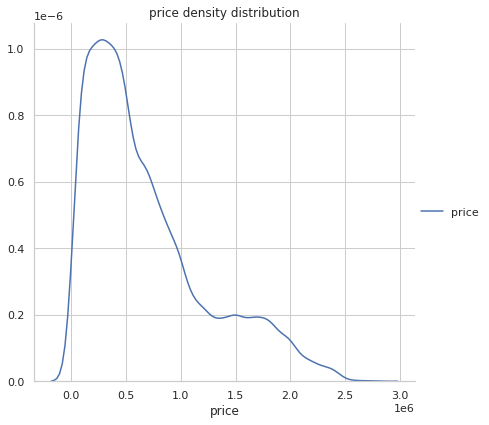

In [ ]:
sns.FacetGrid(data,size=6) \
    .map(sns.kdeplot,"price") \
    .add_legend();
plt.title('price density distribution')
plt.show()

در این مرحله میخواهیم رابطه بین بعضی فیچر ها و نحوه تاثیر آن ها بر یکدیگر را ببینیم.حال نمودار مربوط به رابطه قیمت با برند درج شده در آکهی را بررسی میکنیم. دیده میشود که برند اپل در نمودار دارای قیمت بالاتری است و در مقابل لنوو دارای قیمت (و همچنین تراکم) پایین تری است.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x360 with 0 Axes>

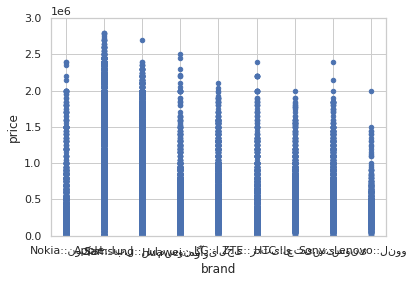

In [ ]:
plt.figure(figsize=(15, 5))
tempData = pd.concat([data['price'], data['brand']], axis=1)
tempData.plot.scatter(x='brand',ylim=(0,3000000), y='price');

In [ ]:
brands = data.brand.unique()
print(pd.Series(brands))

0        Nokia::نوکیا
1          Apple::اپل
2    Samsung::سامسونگ
3       Huawei::هوآوی
4           LG::ال‌جی
5        ZTE::زدتی‌ای
6       HTC::اچ‌تی‌سی
7          Sony::سونی
8        Lenovo::لنوو
dtype: object


In [ ]:
cities = data.city.unique()
print(pd.Series(cities))

0           Qom
1        Tehran
2       Mashhad
3         Karaj
4        Shiraz
5         Ahvaz
6       Isfahan
7        Tabriz
8    Kermanshah
dtype: object


همان طور که در نمودار زیر دیده میشود، با کشیدن نمودار قیمت و شهر ثبت آکهی متوجه میشویم که آگهی های ثبت شده در شهر اهواز قیمت بالاتری نسبت به دیگر شهر ها دارند.و شهر های تبریز و قم نیز به نسبت قیمت های کمتری دارند.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x360 with 0 Axes>

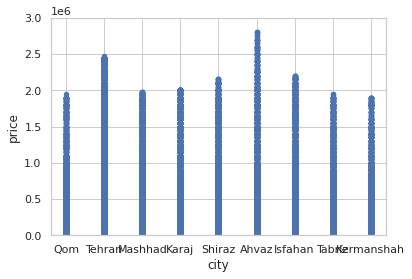

In [ ]:
plt.figure(figsize=(15, 5))
tempData = pd.concat([data['price'], data['city']], axis=1)
tempData.plot.scatter(x='city',ylim=(0,3000000), y='price');

با مشاهده نمودار زیر که مربوط به رابطه و دگرگونی قیمت و تعداد عکس های آکهی نسبت به هم است، متوجه میشویم که تعداد عکس های آگهی تاثیر مستقیم یا برعکس و یا تاثیر قابل پیشبینی و نتیجه گیری ای روی قیمت ندارند و برعکس. که این نتیجه دور از انتظار هم نیست

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x360 with 0 Axes>

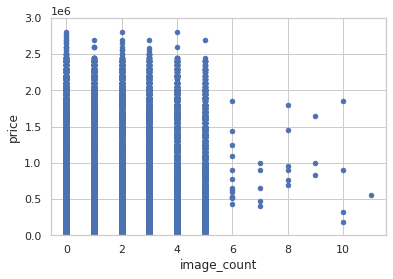

In [ ]:
plt.figure(figsize=(15, 5))
tempData = pd.concat([data['price'], data['image_count']], axis=1)
tempData.plot.scatter(x='image_count',ylim=(0,3000000), y='price');

In [ ]:
prices = data.price.unique()
prices.sort()
prices

array([      1,       2,      75,      80,     100,     110,     120,
           130,     140,     145,     150,     160,     180,     190,
           200,     220,     250,     260,     300,     320,     330,
           350,     380,     390,     400,     430,     444,     450,
           470,     480,     500,     510,     520,     550,     580,
           600,     620,     650,     680,     700,     720,     730,
           750,     760,     780,     800,     820,     850,     870,
           880,     900,     950,     999,    1000,    1050,    1100,
          1150,    1180,    1200,    1250,    1280,    1290,    1300,
          1390,    1400,    1450,    1500,    1550,    1600,    1630,
          1650,    1690,    1700,    1750,    1770,    1780,    1800,
          1850,    1900,    1930,    1950,    1980,    1990,    2000,
          2049,    2080,    2100,    2150,    2200,    2250,    2300,
          2350,    2351,    2400,    2439,    2500,    2600,    2700,
          2800,    2

در این مرحله میخواهیم داده هایی که مقادیر ناسازگار دارند را از مجموعه داده خود حذف کنیم. به این منظور، از نظر منطقی چون قیمت ها به تومان هستند، قیمت های زیر 500 برای هیچ تلفن همراهی منطقی نیست ، بنابراین آن ها را حذف میکنیم.

In [ ]:
inconsistentData = data[data['price'] < 500]
data = data.drop(inconsistentData.index)
data[data['price'] < 100000]

,brand,city,title,desc,image_count,created_at,price
0,Nokia::نوکیا,Qom,نوکیا6303,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,2,Wednesday 07AM,60000
6,Nokia::نوکیا,Tehran,معاوضه نوکیا ۲۱۵ با مودم 4g USB,فروش گوشی طرح نوکیا ۲۱۵\nاین گوشی طرح می باشد....,1,Saturday 05PM,40000
34,Nokia::نوکیا,Tehran,نوکیا1208,همراه با کارتون بدون تعمیر$NUMفقط تماس بگیرید,1,Wednesday 07PM,50000
35,Samsung::سامسونگ,Mashhad,مدل GT-C3303K Champ,لمسی به همراه مداد_دوربین_ساپورت حافظه جانبی_ص...,2,Thursday 05AM,80000
105,Huawei::هوآوی,Mashhad,گوشی هواوی Y220,گوشی سالم است یک خرابی کوچیک داره منزل من چنار...,3,Monday 04PM,80000
...,...,...,...,...,...,...,...
59122,Samsung::سامسونگ,Mashhad,گوشی سامسونگ ،دوسیم کارته،مدلB310E,همراه با کیف چرمی و کارتن درحد نو,1,Wednesday 05AM,60000
59136,ZTE::زدتی‌ای,Isfahan,what's on گوشی بسیار تمیزی است,دارای دوربین،دوسیم کارت،مموری خور,3,Monday 10AM,65000
59147,ZTE::زدتی‌ای,Karaj,گوشی دکمه ای,گوشی همراه شارژر بدون کارتون،تحویل درب منزل,1,Wednesday 02PM,30000
59155,Nokia::نوکیا,Qom,نوکیا,گوشی نوکیا سالم گوشی با شارژر میباشد فقد زنگ ب...,1,Sunday 09AM,45000


In [ ]:
groupedByBrand = data.groupby('brand')
groupedByBrand.mean()

,image_count,price
brand,,
Apple::اپل,1.819898,1.177507e+06
HTC::اچ‌تی‌سی,1.726069,4.750753e+05
Huawei::هوآوی,1.583988,3.527192e+05
LG::ال‌جی,1.606500,5.872976e+05
Lenovo::لنوو,1.557540,3.456513e+05
Nokia::نوکیا,1.789504,2.060341e+05
Samsung::سامسونگ,1.561779,6.691408e+05
Sony::سونی,1.689511,4.804753e+05
ZTE::زدتی‌ای,1.772226,3.879763e+05


In [ ]:
groupedByBrand.median().reset_index()

,brand,image_count,price
0,Apple::اپل,2,1050000
1,HTC::اچ‌تی‌سی,2,430000
2,Huawei::هوآوی,2,300000
3,LG::ال‌جی,2,520000
4,Lenovo::لنوو,2,300000
5,Nokia::نوکیا,2,100000
6,Samsung::سامسونگ,2,555000
7,Sony::سونی,2,440000
8,ZTE::زدتی‌ای,2,240000


In [ ]:
ps = pd.Series(data.brand.unique())
ps

0        Nokia::نوکیا
1          Apple::اپل
2    Samsung::سامسونگ
3       Huawei::هوآوی
4           LG::ال‌جی
5        ZTE::زدتی‌ای
6       HTC::اچ‌تی‌سی
7          Sony::سونی
8        Lenovo::لنوو
dtype: object

In [ ]:
median = [100000, 1050000, 550000, 300000, 520000, 240000, 430000, 440000, 300000]
groupedByBrandMedian = {}
ps = pd.Series(data.brand.unique())
cnt = 0
for p in ps:
    groupedByBrandMedian[p] = median[cnt]
    cnt+=1

با استفاده از مشاهدات بالا (به دست آمردن میانه و میانگین هر برند و مشاهده تعداد قیمت های خیلی کم) و با توجه به این که به دلیل خطای کاربر در وارد کردن اطلاعات، ممکن است یک یا 2 صفر از قیمت کم شده باشد، برای هر داده با توجه به برند آن و میانه ی آن برند، اگر قیمت نسبت به میانه ی برند خیلی کم باشد(کمتر از یک هزارم)، پس خطای آن با اضافه کردن حتی 2 صفر هم درست نمیشود و آن را حذف میکنیم.(تعداد آن ها 79 تا بود) و همچنین اگر قیمت از یک صدم میانه کمتر بود، در صد ضرب میکنیم و در غیر این صورت اگر از یک دهم میانه کمتر بود در 10 ضرب مبکنبم.
در غیر این صورت ها نیز، قیمت را تغییر نمیدهیم.

In [ ]:
def calculatePrice(row):
    if row['price'] < (groupedByBrandMedian[row['brand']]/1000):
        return 0
    elif row['price'] < (groupedByBrandMedian[row['brand']]/100):
        return row['price']*100
    elif row['price'] < (groupedByBrandMedian[row['brand']]/10):
        return row['price']*10
    else:
        return row['price']

def correctIncosistantPrice(data):
    df = data.copy()
    df['newPrice'] = df.apply(lambda x: calculatePrice(x), axis=1)
    inconsistentData = df[df['newPrice'] == 0]
    df = df.drop(inconsistentData.index)
    return df
data = correctIncosistantPrice(data)
oldData = data[data['price'] != data['newPrice']]
oldData

,brand,city,title,desc,image_count,created_at,price,newPrice
125,Samsung::سامسونگ,Tehran,گوشی سامسونگ,گوشی سامسونگ مدل champ صورتی سیستم جاوا با جعب...,1,Sunday 09AM,40000,400000
640,Samsung::سامسونگ,Mashhad,C3303 Champ سامسونگ,ابعاد گوشی : 13 × 96 × 53 \nمیلیمتر وزن : 80 گ...,1,Wednesday 06AM,50000,500000
649,Samsung::سامسونگ,Mashhad,سامسونگ گرند پرایم,سلام گوشیم سالمه,0,Saturday 08AM,39000,390000
758,LG::ال‌جی,Mashhad,گوشی ال جی سالم,گوشی ال جی سالم وساده ضمانتی 25تومان\nوگوشی gl...,1,Sunday 07AM,25000,250000
802,Samsung::سامسونگ,Tabriz,سامسونگ,گوشی سامسونگ سالم\nبدون باطری,2,Thursday 09PM,50000,500000
...,...,...,...,...,...,...,...,...
58845,Apple::اپل,Tehran,١٦آیفون 6sرز گلد,بدون نقطه خط و خش رنگ زیبای رزگلد معاوضه ندارم...,0,Thursday 03PM,1750,175000
58866,LG::ال‌جی,Tehran,گوشی دو سیم کارت LG,گوشی دو سیم کارت ال جی مدل gx300 دارای کارتن و...,5,Saturday 04PM,45000,450000
58925,Samsung::سامسونگ,Isfahan,گوشی سامسونگ,گوشی سامسونگ با شارژر سالم,2,Wednesday 07AM,30000,300000
58927,Samsung::سامسونگ,Karaj,سامسونگ s3600,قیمت مقطوع,1,Thursday 10AM,50000,500000


In [ ]:
data.pop('price')
npp = pd.Series(data.newPrice.unique())
for n in npp:
    print(n)
data = data.rename(columns = {"newPrice":"price"})
data

60000
1150000
590000
1100000
900000
800000
40000
310000
1700000
250000
850000
600000
1500000
400000
650000
200000
2360000
670000
2250000
700000
490000
380000
50000
80000
750000
270000
450000
2400000
1900000
1630000
320000
500000
110000
580000
950000
170000
1070000
175000
180000
350000
150000
1350000
190000
1650000
2000000
370000
550000
1250000
960000
680000
230000
430000
520000
1800000
420000
480000
1550000
140000
1180000
360000
100000
1300000
830000
160000
530000
30000
570000
300000
90000
1540000
1400000
1670000
1050000
130000
120000
1450000
280000
1685000
75000
795000
390000
290000
760000
260000
1750000
330000
1850000
1830000
35000
2450000
1000000
1600000
410000
1200000
2430000
460000
1950000
620000
610000
25000
2150000
440000
1210000
199000
385000
1220000
315000
740000
790000
195000
1420000
1690000
930000
55000
2300000
135000
980000
435000
1480000
2100000
835000
870000
690000
880000
375000
470000
2200000
920000
540000
2180000
89000
720000
543000
780000
1730000
1190000
251000
730000


,brand,city,title,desc,image_count,created_at,price
0,Nokia::نوکیا,Qom,نوکیا6303,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,2,Wednesday 07AM,60000
1,Apple::اپل,Tehran,ایفون ٥اس٣٢گیگ,درحد نو سالم اصلى بدون ضربه مهلت تست میدم,0,Wednesday 11AM,1150000
2,Samsung::سامسونگ,Mashhad,سامسونگ j5,گوشى بسیار بسیار تمیز و فقط سه هفته کارکرده و ...,2,Wednesday 02PM,590000
3,Apple::اپل,Karaj,گرى 5s ایفون 32گیگ,گلس پشت و رو .کارت اپل ای دی. لوازم جانبی اصلی...,3,Wednesday 04PM,1100000
4,Samsung::سامسونگ,Tehran,galaxy S5 Gold در حد آک,کاملا تمیز و بدون حتی 1 خط و خش\nبه همراه گلاس...,2,Friday 01PM,900000
...,...,...,...,...,...,...,...
59184,Apple::اپل,Tehran,گوشی موبایل ایفون(4S (32GB,گوشی موبایل ایفون 4S\n32 گیگ سفید سالم دکمه هو...,3,Tuesday 03PM,500000
59185,LG::ال‌جی,Mashhad,گوشی ال جی k10تمیزومرتب بدون خط وخش,گوشی ال جی سالم وبدون کوچکترین ایرادوبدون خط و...,3,Tuesday 05PM,520000
59186,Apple::اپل,Tehran,/١٦gig/5s/گلد,جعبه ولوازم LLAاصل/بدون خط وخش/باز نشده/سالم.,2,Wednesday 11AM,720000
59187,Samsung::سامسونگ,Tehran,گلکسی galaxy s4 i9500,سالم و تمیز با لوازم\nاندروید 5. باتری اورجینا...,2,Thursday 09AM,475000


In [ ]:
from datetime import datetime
import numpy as np

حال به سراغ فیچر هایی میرویم که مقادیر آن ها عدد نیست. این فیچر ها به این صورت نمیتواند به ما کمکی کنند و باید آن ها به مقدار عددی تبدیل کنیم.
برای این کار از روش وان هات یا لیبل انکد استفاده میکنیم.
و یا در صورت امکان، داده ی مربوط به آن را به بخش های معنی دار و مفید تبدیل میکنیم.

به طور مثال برای ستون تاریخ ثبت، میتوانیم از داخل آن مقادیری مانند این که در چه روز و چه ساعتی ثبت شده را به صورت عددی ذخیره کنیم و داده ی مربوط به ساعت را وان هات کنیم.
برای این کار ابتدا عددی که نشان دهنده ی روز ثبت آگهی باشد را استخراج و ذخیره میکنیم.
سپس مقدار ساعت را به فرم نظامی در بازه 0 تا 24 تبدیل میکنیم.
و همچنین ستونی را به این که در آخر هفته هستیم یا نه احتصاص میدهیم.


In [ ]:
def extractDateInformation(data):
    df = data.copy()
    date = df['created_at'].str.split(' ', n = 1, expand = True)
    date['day_name'] = date[0]
    date['time'] = date[1]
    date.pop(1)
    date.pop(0)
    day_name = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    days = dict(zip(day_name, range(7)))
    date['day_num'] = date['day_name'].replace(days, inplace=False)
    date['hour'] = date['time'].apply(lambda x: datetime.strptime(x, '%I%p').strftime('%H'))
    date['is_weekend'] = np.where(date['day_name'].isin(['Friday','Thursday']),1,0)
    df['day_num'] = date['day_num']
    df['hour'] = date['hour']
    df['is_weekend'] = date['is_weekend']
    df.pop('created_at')
    return df

In [ ]:
data = extractDateInformation(data)
data

,brand,city,title,desc,image_count,price,day_num,hour,is_weekend
0,Nokia::نوکیا,Qom,نوکیا6303,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,2,60000,4,07,0
1,Apple::اپل,Tehran,ایفون ٥اس٣٢گیگ,درحد نو سالم اصلى بدون ضربه مهلت تست میدم,0,1150000,4,11,0
2,Samsung::سامسونگ,Mashhad,سامسونگ j5,گوشى بسیار بسیار تمیز و فقط سه هفته کارکرده و ...,2,590000,4,14,0
3,Apple::اپل,Karaj,گرى 5s ایفون 32گیگ,گلس پشت و رو .کارت اپل ای دی. لوازم جانبی اصلی...,3,1100000,4,16,0
4,Samsung::سامسونگ,Tehran,galaxy S5 Gold در حد آک,کاملا تمیز و بدون حتی 1 خط و خش\nبه همراه گلاس...,2,900000,6,13,1
...,...,...,...,...,...,...,...,...,...
59184,Apple::اپل,Tehran,گوشی موبایل ایفون(4S (32GB,گوشی موبایل ایفون 4S\n32 گیگ سفید سالم دکمه هو...,3,500000,3,15,0
59185,LG::ال‌جی,Mashhad,گوشی ال جی k10تمیزومرتب بدون خط وخش,گوشی ال جی سالم وبدون کوچکترین ایرادوبدون خط و...,3,520000,3,17,0
59186,Apple::اپل,Tehran,/١٦gig/5s/گلد,جعبه ولوازم LLAاصل/بدون خط وخش/باز نشده/سالم.,2,720000,4,11,0
59187,Samsung::سامسونگ,Tehran,گلکسی galaxy s4 i9500,سالم و تمیز با لوازم\nاندروید 5. باتری اورجینا...,2,475000,5,09,1


In [ ]:
testData = extractDateInformation(testData)
testData

,brand,city,title,desc,image_count,price,day_num,hour,is_weekend
23,Samsung::سامسونگ,Karaj,A3 2015,گوشی در حده نو کلا 2 هفتس خریدمش.با تشکر از سا...,1,-1,3,12,0
28,Apple::اپل,Qom,اپل 5s ٣٢ گیگ بسیار تمیز در حد,گوشی بسیار تمیز در حد قیمت مقطوع میباشد لطفا ت...,2,-1,0,04,0
32,Apple::اپل,Shiraz,اقساط٢٤ماهه بدون پیش پرداخت,اقساط ٢٤ماهه بدون پیش پرداخت,0,-1,1,15,0
36,Sony::سونی,Qom,سونی مدل acro s گوشی هواوی y300,"گوشی سونی مدل acro s دوربین 12 فیلمبرداری HD ,...",2,-1,5,06,1
44,HTC::اچ‌تی‌سی,Tehran,ّگوشی موبایل htc desire610 جهت معاوضه,معاوضه با ایفون 4\nگوشیم سالم سالم 4g\nبدون هی...,0,-1,2,20,0
...,...,...,...,...,...,...,...,...,...
59121,Lenovo::لنوو,Karaj,گوشی موبایل HuaweiG610,دست دوم خیلی نو فقط هارد گوشی سوخته باید تعمیر...,3,-1,3,11,0
59146,Samsung::سامسونگ,Karaj,گوشی سامسونگ گلکسی مینی اندروید,گوشی سامسونگ گلکسی مینی اندروید\nتمیز \nدر حد نو,3,-1,4,13,0
59169,Apple::اپل,Shiraz,iPhone SE 16GB / RoseGold,آیفون فوق بسیار تمیز و در حد نو می‌باشد(بدون ه...,4,-1,1,12,0
59174,Samsung::سامسونگ,Mashhad,نوت 5گلدتک سیم درحدمعاوضه فقط با 5sیا6s,در حد اک ۳۲گیگ معاوضه فقط با اپل ۵اس یا ۶اس ۶۴...,0,-1,3,10,0


برای مشاهده ی رابطه فیچر های جدید با قیمت، نمودار زیر را رسم میکنیم که در آن نشان میدهم که آگهی های ثبت شده در یک شنبه (و شنبه) مقادیر بیشتری به نسبت دارند. اما تفاوت آنچنانی مضاهده نمیشود.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x360 with 0 Axes>

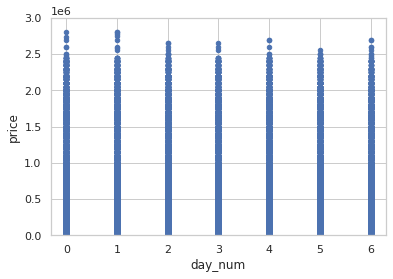

In [ ]:
plt.figure(figsize=(15, 5))
tempData = pd.concat([data['price'], data['day_num']], axis=1)
tempData.plot.scatter(x='day_num',ylim=(0,3000000), y='price');

سپس رابطه ی ساعت را با قیمت بررسی میکنیم که در آن 12 و 17 تراکم و قیمت نسبتاااا بالاتری دارند اما بازهم تفاوت فاحشی دیده نمیشود.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x360 with 0 Axes>

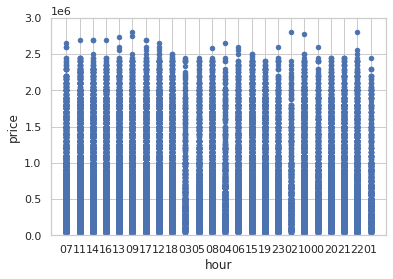

In [ ]:
plt.figure(figsize=(15, 5))
tempData = pd.concat([data['price'], data['hour']], axis=1)
tempData.plot.scatter(x='hour',ylim=(0,3000000), y='price');

سپس تاثیر آخر هفته بودن یا نبودن را مشاهده میکنیم بر قیمت و دیده میشود که به طور نسبی در روز هایی که آخر هفته نیستند(پنج شنبه و جمعه نیستند)،قیمت کم بیشتر بوده

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x360 with 0 Axes>

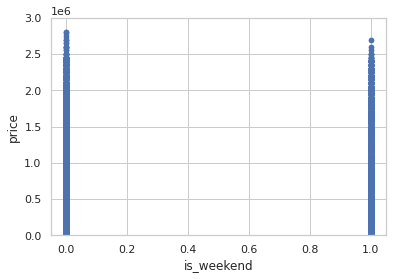

In [ ]:
plt.figure(figsize=(15, 5))
tempData = pd.concat([data['price'], data['is_weekend']], axis=1)
tempData.plot.scatter(x='is_weekend',ylim=(0,3000000), y='price');

In [ ]:
!pip install unidecode

حال میخواهیم برای استفاده از داده های متنی که در عنوان و توضیحات قرار دارند، از فیچر انجینیرینگ استفاده کنیم تا بتوانیم فیچر های کاربردی که میتوانند روی قیمت تاثیر گذار باشند را به دست آوریم.

برای ستون عنوان، ابتدا به کمک کتابخانه هضم، کلمات موجود در عنوان را نرمال می کنیم و از هم جدا میکنیم. تا بتوانیم از آن ها استفاده کنیم. (از استمینگ استفاده نشد چون تعداد زیادی از کلمات معنی دار را خراب میکرد.)
از میان کلمات جدا شده، اگر عدد مربوط به حجم تلفن به صورت عددی (فارسی یا انگلیسی) وارد شده باشد، میتوانیم آن را استخراج کرده و به ویزگی ها اضافه کنیم . (واضح است که با قیمت رابطه مستقیم دارد اما چون ذکر کردن آن اجباری نیست، ممکن است آگهی هایی که این ویژگی را ذکر نکرده اند کم تر از قیمت واقعی تخمین بزنیم.)

از دیگر فیچر هایی که می توان از عنوان استخراج کرد، میتوان

1.   یافتن تمام کلمات عنوان ها، و محاسبه احتمال برای کلمه های پر تکرار
2.   استفاده از tfidf


1.   بتوان مدل گوشی را استخراج کرد
2.   تعداد کلمات عنوان آگهی
و... اشاره کرد که به دلیل کم بودن زمان پروژه و وقت گیر بودن این بخش، آن ها را لحاظ نکردیم.
همچنین تلاش زیادی برای به دست آوردن TFIDF
کردم اما متاسفانه کرش میکرد و مهلتی برای رفع این اشکال نداشتم.




In [ ]:
from __future__ import unicode_literals
from hazm import *
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def wordStemmer(text):
    stemmer = Stemmer()
    stem_text = [stemmer.stem(i) for i in text]
    return stem_text

from unidecode import unidecode
def hasStorage(text):
    storage = ['8', '16', '32', '64', '128']
    for i in text:
        if unidecode(i) in storage:
            return int(unidecode(i))
    return 0
def preProcessTitleData(data):
    df = data.copy()
    normalizer = Normalizer(persian_numbers=False)
    tokenizer = WordTokenizer()
    df['processed_title'] = df['title'].apply(lambda elem: re.sub(r'[^\w]', ' ', elem))
    df['processed_title'] = df['processed_title'].apply(normalizer.normalize)
    df['processed_title'] = df['processed_title'].apply(tokenizer.tokenize)
    df['storage'] = df['processed_title'].apply(lambda x: hasStorage(x))
    df.pop('processed_title')
    # data['processed_title'] = data['processed_title'].apply(lambda x: wordStemmer(x))
    return df

In [ ]:
data = preProcessTitleData(data)
vectorizer = TfidfVectorizer()
# data['titleTfidf'] = vectorizer.fit_transform(data['title'])
data.pop('title')
data

,brand,city,desc,image_count,price,day_num,hour,is_weekend,storage
0,Nokia::نوکیا,Qom,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,2,60000,4,07,0,0
1,Apple::اپل,Tehran,درحد نو سالم اصلى بدون ضربه مهلت تست میدم,0,1150000,4,11,0,32
2,Samsung::سامسونگ,Mashhad,گوشى بسیار بسیار تمیز و فقط سه هفته کارکرده و ...,2,590000,4,14,0,0
3,Apple::اپل,Karaj,گلس پشت و رو .کارت اپل ای دی. لوازم جانبی اصلی...,3,1100000,4,16,0,32
4,Samsung::سامسونگ,Tehran,کاملا تمیز و بدون حتی 1 خط و خش\nبه همراه گلاس...,2,900000,6,13,1,0
...,...,...,...,...,...,...,...,...,...
59184,Apple::اپل,Tehran,گوشی موبایل ایفون 4S\n32 گیگ سفید سالم دکمه هو...,3,500000,3,15,0,32
59185,LG::ال‌جی,Mashhad,گوشی ال جی سالم وبدون کوچکترین ایرادوبدون خط و...,3,520000,3,17,0,0
59186,Apple::اپل,Tehran,جعبه ولوازم LLAاصل/بدون خط وخش/باز نشده/سالم.,2,720000,4,11,0,16
59187,Samsung::سامسونگ,Tehran,سالم و تمیز با لوازم\nاندروید 5. باتری اورجینا...,2,475000,5,09,1,0


In [ ]:
testData = preProcessTitleData(testData)
# testData['titleTfidf'] = vectorizer.transform(testData['title'])
testData.pop('title')
testData

,brand,city,desc,image_count,price,day_num,hour,is_weekend,storage
23,Samsung::سامسونگ,Karaj,گوشی در حده نو کلا 2 هفتس خریدمش.با تشکر از سا...,1,-1,3,12,0,0
28,Apple::اپل,Qom,گوشی بسیار تمیز در حد قیمت مقطوع میباشد لطفا ت...,2,-1,0,04,0,32
32,Apple::اپل,Shiraz,اقساط ٢٤ماهه بدون پیش پرداخت,0,-1,1,15,0,0
36,Sony::سونی,Qom,"گوشی سونی مدل acro s دوربین 12 فیلمبرداری HD ,...",2,-1,5,06,1,0
44,HTC::اچ‌تی‌سی,Tehran,معاوضه با ایفون 4\nگوشیم سالم سالم 4g\nبدون هی...,0,-1,2,20,0,0
...,...,...,...,...,...,...,...,...,...
59121,Lenovo::لنوو,Karaj,دست دوم خیلی نو فقط هارد گوشی سوخته باید تعمیر...,3,-1,3,11,0,0
59146,Samsung::سامسونگ,Karaj,گوشی سامسونگ گلکسی مینی اندروید\nتمیز \nدر حد نو,3,-1,4,13,0,0
59169,Apple::اپل,Shiraz,آیفون فوق بسیار تمیز و در حد نو می‌باشد(بدون ه...,4,-1,1,12,0,16
59174,Samsung::سامسونگ,Mashhad,در حد اک ۳۲گیگ معاوضه فقط با اپل ۵اس یا ۶اس ۶۴...,0,-1,3,10,0,0


در نمودار زیر میتوانیم رابطه حافظه و قیمت را ببینیم. همان طور که دیده میشود، برای حافظه های بالا، قیمت کم، کم تر دیده میشود. و همچنین تعداد آگهی هایی که  حافظه را وارد نکرده اند بسیار زیاد است.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x360 with 0 Axes>

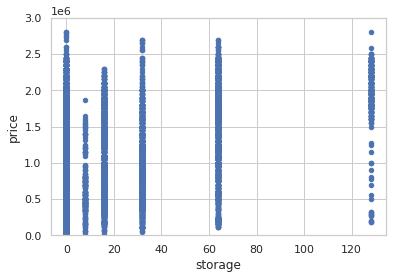

In [ ]:
plt.figure(figsize=(15, 5))
tempData = pd.concat([data['price'], data['storage']], axis=1)
tempData.plot.scatter(x='storage',ylim=(0,3000000), y='price');

در ادامه تلاش هایی برای اضافه کردن میانگین قیمت رند و یا میانه ی قیمت برند هم انجام شد اما به دلیل تکراری بودن برای تعداد زیادی از داده ها و نتیجه خیلی مطلوب نداشتن، از آن صر نظر کردیم.

In [ ]:
# data['brand_mean_price'] = data.groupby('brand')['price'].transform('mean')
# testData['brand_mean_price'] = testData.groupby('brand')['price'].transform('mean')
# data


brandMeanPrice = data.groupby('brand')['price'].transform('mean')
brandMeanPrice

0        2.060909e+05
1        1.188559e+06
2        6.755391e+05
3        1.188559e+06
4        6.755391e+05
             ...     
59184    1.188559e+06
59185    5.937216e+05
59186    1.188559e+06
59187    6.755391e+05
59188    4.813324e+05
Name: price, Length: 53141, dtype: float64

In [ ]:
# sns.regplot(x='brand_mean_price', y='price', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'})
# plt.title('brand_mean_price vs price(target)')

In [ ]:
# data['brand_median_price'] = data.groupby('brand')['price'].transform('median')
# testData['brand_median_price'] = testData.groupby('brand')['price'].transform('median')
# data


brandMedianPrice = data.groupby('brand')['price'].transform('median')
brandMedianPrice

0         100000
1        1080000
2         555000
3        1080000
4         555000
          ...   
59184    1080000
59185     520000
59186    1080000
59187     555000
59188     440000
Name: price, Length: 53141, dtype: int64

In [ ]:
# sns.regplot(x='brand_median_price', y='price', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'})
# plt.title('brand_median_price vs price(target)') 

In [ ]:
# data['city_median_price'] = data.groupby('city')['price'].transform('median')
# testData['city_median_price'] = testData.groupby('city')['price'].transform('median')
# sns.regplot(x='city_median_price', y='price', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'})
# plt.title('city_median_price vs price(target)') 

In [ ]:
# data['city_mean_price'] = data.groupby('city')['price'].transform('mean')
# testData['city_mean_price'] = testData.groupby('city')['price'].transform('mean')
# sns.regplot(x='city_mean_price', y='price', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'})
# plt.title('city_mean_price vs price(target)') 

در ادامه ی به دست آوردن فیچر از داده های متنی ، داده های مربوط به ستون توضیحات را پیش پردازش میکنیم.
مراحل پیش پردازش عینا مانند ستون عنوان است. اما در این جا، به کلماتی مانند سالم، نو، تمیز و آکبند توجه میکنیم. زیرا نیزان تکرار آن ها بالا بوده و همچنین واضح است که در صورت داشتن این شرایط، نسبت به محصولات مشابه خود میتوانند قیمت بالاتری داشته باشند.
و بودن یا نبودن این کلمات را در یک ستون جدید مشخص میکنیم.
برای این ستون نیز فیپر های زیادی میشود استخراج کرد اما هم زمان کمی داشتیم و هم کتابخانه مربوط به زبان فارسی هیلی غنی و آشنا نبود.
اما همان فیچر هایی که قبلا گفته شد را برای این ستون نیز میشد استخراج کرد.

In [ ]:
def isNew(text):
    words = ['نو', 'آک', 'آکبند', 'سالم', 'تمیز']
    for i in text:
        if i in words:
            return 1
    return 0
def preProcessDescData(data):
    df = data.copy()
    normalizer = Normalizer(persian_numbers=False)
    tokenizer = WordTokenizer()
    
    df['processed_desc'] = df['desc'].apply(lambda elem: re.sub(r'[^\w]', ' ', elem))
    df['processed_desc'] = df['processed_desc'].apply(lambda x: x.replace("\n", " "))
    df['processed_desc'] = df['processed_desc'].apply(lambda x: x.replace("\r", " "))    
    df['processed_desc'] = df['processed_desc'].apply(normalizer.normalize)
    df['processed_desc'] = df['processed_desc'].apply(tokenizer.tokenize)
    df['is_new'] = df['processed_desc'].apply(lambda x: isNew(x))
    df.pop('processed_desc')

    # data['processed_title'] = data['processed_title'].apply(lambda x: isNew(x))
    return df

In [ ]:
data = preProcessDescData(data)
vectorizer = TfidfVectorizer()
# data['descTfidf'] = vectorizer.fit_transform(data['desc'])
data.pop('desc')
data

,brand,city,image_count,price,day_num,hour,is_weekend,storage,is_new
0,Nokia::نوکیا,Qom,2,60000,4,07,0,0,1
1,Apple::اپل,Tehran,0,1150000,4,11,0,32,1
2,Samsung::سامسونگ,Mashhad,2,590000,4,14,0,0,1
3,Apple::اپل,Karaj,3,1100000,4,16,0,32,0
4,Samsung::سامسونگ,Tehran,2,900000,6,13,1,0,1
...,...,...,...,...,...,...,...,...,...
59184,Apple::اپل,Tehran,3,500000,3,15,0,32,1
59185,LG::ال‌جی,Mashhad,3,520000,3,17,0,0,1
59186,Apple::اپل,Tehran,2,720000,4,11,0,16,1
59187,Samsung::سامسونگ,Tehran,2,475000,5,09,1,0,1


حال رابطه بین قیمت و وجود آن کلمات در توضیحات را بررسی میکنیم.
همانطور که دیده میشود تفاوت آنچنانی دیده نشود.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x360 with 0 Axes>

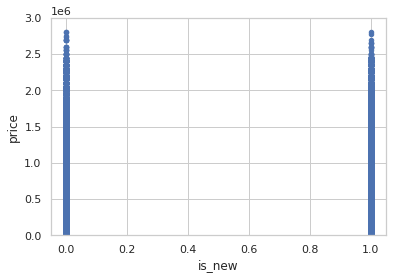

In [ ]:
plt.figure(figsize=(15, 5))
tempData = pd.concat([data['price'], data['is_new']], axis=1)
tempData.plot.scatter(x='is_new',ylim=(0,3000000), y='price');

In [ ]:
testData = preProcessDescData(testData)
# testData['descTfidf'] = vectorizer.transform(testData['desc'])
testData.pop('desc')
testData

,brand,city,image_count,price,day_num,hour,is_weekend,storage,is_new
23,Samsung::سامسونگ,Karaj,1,-1,3,12,0,0,1
28,Apple::اپل,Qom,2,-1,0,04,0,32,1
32,Apple::اپل,Shiraz,0,-1,1,15,0,0,0
36,Sony::سونی,Qom,2,-1,5,06,1,0,1
44,HTC::اچ‌تی‌سی,Tehran,0,-1,2,20,0,0,1
...,...,...,...,...,...,...,...,...,...
59121,Lenovo::لنوو,Karaj,3,-1,3,11,0,0,1
59146,Samsung::سامسونگ,Karaj,3,-1,4,13,0,0,1
59169,Apple::اپل,Shiraz,4,-1,1,12,0,16,1
59174,Samsung::سامسونگ,Mashhad,0,-1,3,10,0,0,1


حال باید در این مرحله یچر های کتگوریکال را به مقادیر عددی تبدیل کنیم. همانطور که گفته شد، این فیچر ها میتوانند با وان هات یا لیبل انکد تبدیل شوند. وان هات بدی ای که دارد این است که تعداد شتون ها را زیاد میکند و ممکن است تعداد زیادی از داده ها مقدار صفر در آن ستون داشته باشند. اما خوبی آن این است که در روش هایی که مقادیر مهم هستند و به طور مثال فاصله مطرح است، بهتر است از آن استفاده کنیم چون بر خلاف لیبل، به مقادیری که نسبت به هم اولویت ندارند، اولویت نمیدهد.

In [ ]:
def oneHotEncode(data, columnName):
    labeledData = data.copy()
    newColumn = pd.get_dummies(labeledData[columnName], prefix=columnName)
    labeledData = pd.concat([labeledData, newColumn], axis=1)
    return labeledData

In [ ]:
def applyOneHotEncode(data):
    categoricalColumns = ['brand', 'city', 'hour']
    for col in categoricalColumns:
        data = oneHotEncode(data, col)
        data.pop(col)
    return data

In [ ]:
data = applyOneHotEncode(data)
data

,image_count,price,day_num,is_weekend,storage,is_new,brand_Apple::اپل,brand_HTC::اچ‌تی‌سی,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony::سونی,brand_ZTE::زدتی‌ای,city_Ahvaz,city_Isfahan,city_Karaj,city_Kermanshah,city_Mashhad,city_Qom,city_Shiraz,city_Tabriz,city_Tehran,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2,60000,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1150000,4,0,32,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,590000,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,1100000,4,0,32,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,900000,6,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59184,3,500000,3,0,32,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
59185,3,520000,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59186,2,720000,4,0,16,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
59187,2,475000,5,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
testData = applyOneHotEncode(testData)
testData

,image_count,price,day_num,is_weekend,storage,is_new,brand_Apple::اپل,brand_HTC::اچ‌تی‌سی,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony::سونی,brand_ZTE::زدتی‌ای,city_Ahvaz,city_Isfahan,city_Karaj,city_Kermanshah,city_Mashhad,city_Qom,city_Shiraz,city_Tabriz,city_Tehran,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
23,1,-1,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
28,2,-1,0,0,32,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,0,-1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
36,2,-1,5,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,0,-1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59121,3,-1,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
59146,3,-1,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
59169,4,-1,1,0,16,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
59174,0,-1,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dataTitleTfidf = data.pop('titleTfidf')
# dataDescTfidf = data.pop('descTfidf')
# testDataTitleTfidf = testData.pop('titleTfidf')
# testDataDescTfidf = testData.pop('descTfidf')

اینفورمیشین گین را به ازای فیچر های عددی ای که به دست آوردیم محاسبه میکنیم. و نمودار آن به صورت زیر است.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
goal = data.pop('price')
informationGain = mutual_info_classif(data, goal, discrete_features = True)
informationGain

array([0.0494395 , 0.03283519, 0.00674648, 0.18697574, 0.00938057,
       0.16320528, 0.01240694, 0.06775478, 0.01000752, 0.01084233,
       0.08658683, 0.0331278 , 0.01971954, 0.01369845, 0.00851397,
       0.00636039, 0.00712486, 0.00737561, 0.01513416, 0.0076777 ,
       0.00688407, 0.0073119 , 0.02730317, 0.0038194 , 0.00291394,
       0.0029303 , 0.00250491, 0.00375388, 0.00395499, 0.00378837,
       0.00399744, 0.00444176, 0.00434692, 0.00475494, 0.00485389,
       0.00465401, 0.00490083, 0.00461797, 0.00453253, 0.00459698,
       0.0047394 , 0.00446123, 0.00495045, 0.00442226, 0.00402715,
       0.00374533, 0.00331375])

['image_count', 'day_num', 'is_weekend', 'storage', 'is_new', 'brand_Apple::اپل', 'brand_HTC::اچ\u200cتی\u200cسی', 'brand_Huawei::هوآوی', 'brand_LG::ال\u200cجی', 'brand_Lenovo::لنوو', 'brand_Nokia::نوکیا', 'brand_Samsung::سامسونگ', 'brand_Sony::سونی', 'brand_ZTE::زدتی\u200cای', 'city_Ahvaz', 'city_Isfahan', 'city_Karaj', 'city_Kermanshah', 'city_Mashhad', 'city_Qom', 'city_Shiraz', 'city_Tabriz', 'city_Tehran', 'hour_00', 'hour_01', 'hour_02', 'hour_03', 'hour_04', 'hour_05', 'hour_06', 'hour_07', 'hour_08', 'hour_09', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']


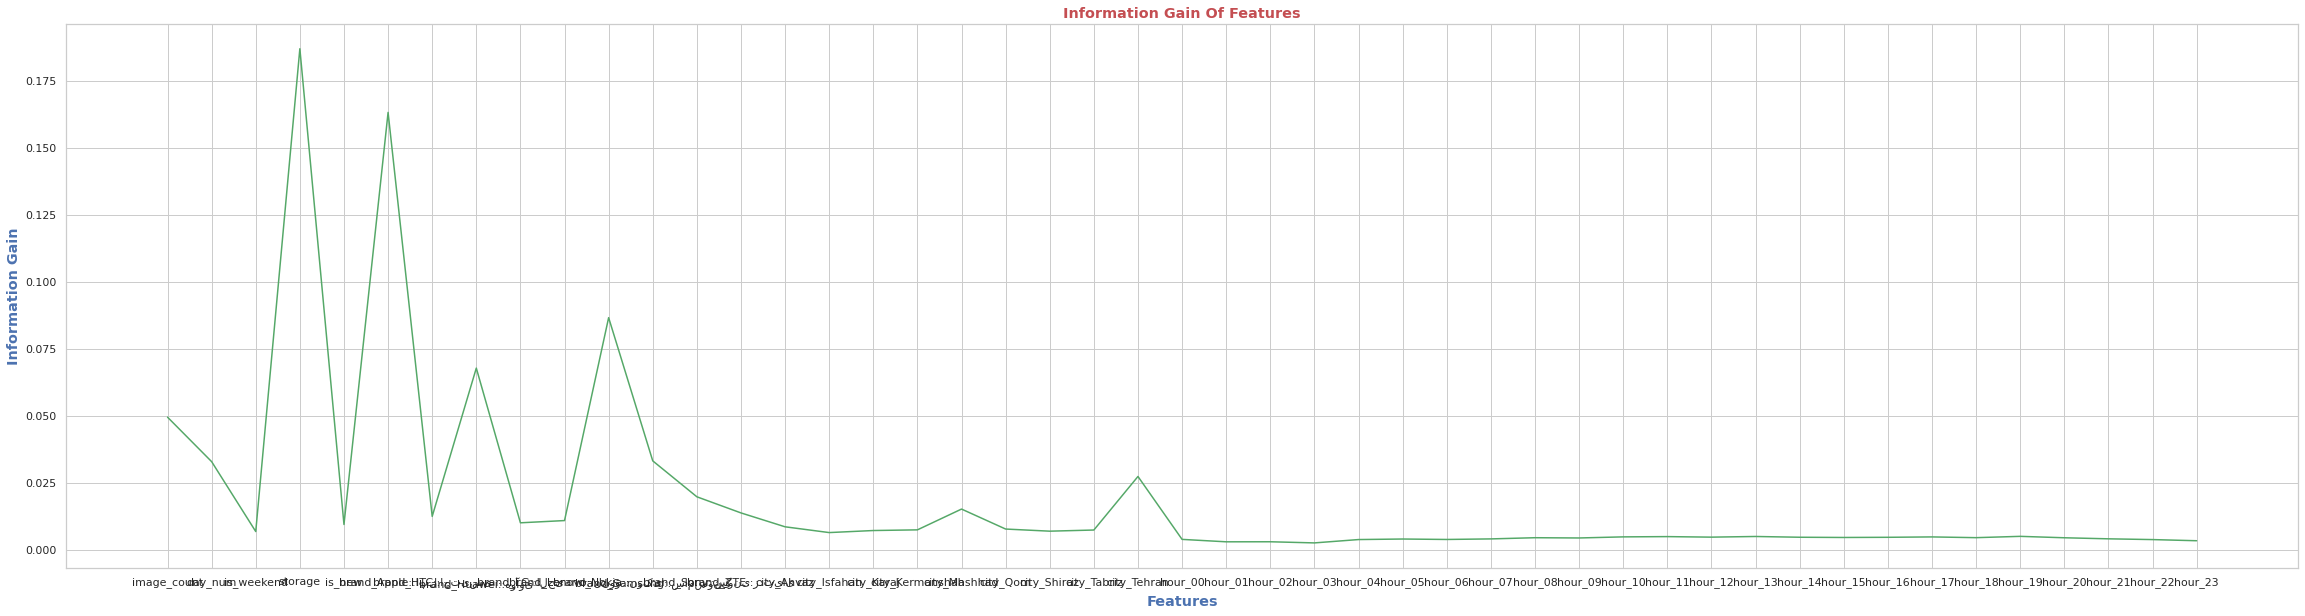

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
plt.plot(data.columns, informationGain, color = 'g')
plt.title('Information Gain Of Features', weight='bold', size='large', color = 'r')
plt.xlabel('Features', weight='bold', size='large', color = 'b')
plt.ylabel('Information Gain', weight='bold', size='large', color = 'b')
print(list(data.columns))

میتوانیم داده ها را اسکیل کنیم تا در یک محدوده قرار داشته باشند و مقادیر آن ها بازه های خیلی متفاوت نداشته باشند.
اما گاهی اوقات کمک چندانی نمیکند

In [ ]:
from sklearn import preprocessing
def scaleDataColumns(data, columns):
    scaler = preprocessing.StandardScaler()
    scaledData = data.copy()
    scaledData[columns] = scaler.fit_transform(scaledData[columns])
    return scaledData

In [ ]:
cols = list(data.columns)
# data = scaleDataColumns(data, cols)
data

,image_count,day_num,is_weekend,storage,is_new,brand_Apple::اپل,brand_HTC::اچ‌تی‌سی,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony::سونی,brand_ZTE::زدتی‌ای,city_Ahvaz,city_Isfahan,city_Karaj,city_Kermanshah,city_Mashhad,city_Qom,city_Shiraz,city_Tabriz,city_Tehran,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,0,32,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,4,0,32,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,6,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59184,3,3,0,32,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
59185,3,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59186,2,4,0,16,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
59187,2,5,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
testData.pop('price')
cols = list(testData.columns)
# testData = scaleDataColumns(testData, cols)
testData

,image_count,day_num,is_weekend,storage,is_new,brand_Apple::اپل,brand_HTC::اچ‌تی‌سی,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony::سونی,brand_ZTE::زدتی‌ای,city_Ahvaz,city_Isfahan,city_Karaj,city_Kermanshah,city_Mashhad,city_Qom,city_Shiraz,city_Tabriz,city_Tehran,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
23,1,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
28,2,0,0,32,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
36,2,5,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59121,3,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
59146,3,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
59169,4,1,0,16,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
59174,0,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


حال بخشی از داده های آموزش را به عنوان ولیدیشن جدا میکنیم تا بتوانیم به کممک آن ها، هایپر پارامتر ها را تعیین کنیم.

In [ ]:
from sklearn.model_selection import train_test_split
data = data.sample(frac=1)
data.sample(frac=1).reset_index(drop=True)
xTrain, xTest, yTrain, yTest = train_test_split(data, goal, random_state=42, test_size=0.2)

با توجه به مدل که پیچیدگی خیلی زیادی ندارد و تعداد داده خیلی زیادی ندارد و با توجه به تصویر نمایی از داده ها، چند مدل را برای آموزش استفاده میکنیم که به صورت زیر هستند

برای هر مدل با 2 فرمول خطا ر محاسبه مینیم و نشان میدهیم.
همچنین خطا را روی داده های آموزش نیز به دست میاوریم تا مطمین باشم که دچار اورفیت شده این یا نه.(که نشدیم)

In [ ]:
from sklearn.linear_model import LinearRegression
def applyLinearRegression(xTrain, yTrain, xTest, yTest):
    regressor = LinearRegression()  
    regressor.fit(xTrain, yTrain)
    yTestPred = regressor.predict(xTest)
    yTrainPred = regressor.predict(xTrain)
    finalTest = regressor.predict(testData)
    return yTestPred, yTrainPred, finalTest

In [ ]:
testRes, trainRes, finalTest = applyLinearRegression(xTrain, yTrain, xTest, yTest)
df = pd.DataFrame({'Actual': yTest, 'Predicted': testRes})
df

,Actual,Predicted
26052,1100000,683210.0
8758,460000,747710.0
26145,500000,677992.0
24143,650000,734990.0
29991,300000,687098.0
...,...,...
46405,100000,712000.0
4180,1000000,723324.0
54425,450000,677972.0
48987,175000,686304.0


In [ ]:
df = pd.DataFrame({'Actual': yTrain, 'Predicted': trainRes})
df

,Actual,Predicted
47439,450000,698092.0
30755,400000,709880.0
4195,670000,721724.0
42976,300000,706226.0
13416,1880000,698166.0
...,...,...
12553,560000,675806.0
49814,550000,713032.0
42506,330000,704372.0
960,690000,721260.0


In [ ]:
df = pd.DataFrame({'Predicted': finalTest})

In [ ]:
df

,Predicted
0,709176.0
1,661656.0
2,676912.0
3,697400.0
4,744720.0
...,...
5883,715736.0
5884,732032.0
5885,673736.0
5886,727086.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, testRes))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, testRes)))

Mean Absolute Error: 435199.1447925487
Root Mean Squared Error: 546707.1835583007


In [ ]:
import lightgbm as lgb
def lgbReg(xTrain, yTrain, xTest, yTest):
    lgbReg = lgb.LGBMRegressor(subsample=0.9, n_estimators=260)
    lgbReg.fit(xTrain, yTrain)
    yTestPred = lgbReg.predict(xTest)
    yTrainPred = lgbReg.predict(xTrain)
    finalTest = lgbReg.predict(testData)
    return yTestPred, yTrainPred, finalTest

In [ ]:
testRes2, trainRes2, finalTest2 = lgbReg(xTrain, yTrain, xTest, yTest)
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, testRes2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, testRes2)))

Mean Absolute Error: 436395.78849830345
Root Mean Squared Error: 548584.0538804294


In [ ]:
df = pd.DataFrame({'Predicted': finalTest2})
df

,Predicted
0,693854.932852
1,575031.928050
2,687423.241508
3,619981.040235
4,817214.833138
...,...
5883,693628.124297
5884,708454.197309
5885,698543.692943
5886,716132.011111


In [ ]:
from sklearn.tree import DecisionTreeRegressor
def applyTreeRegression(xTrain, yTrain, xTest, yTest):
    treeReg = DecisionTreeRegressor(random_state=0)
    treeReg.fit(xTrain, yTrain)
    yTestPred = treeReg.predict(xTest)
    yTrainPred = treeReg.predict(xTrain)
    finalTest = treeReg.predict(testData)
    return yTestPred, yTrainPred, finalTest

In [ ]:
testRes3, trainRes3, finalTest3 = applyTreeRegression(xTrain, yTrain, xTest, yTest)
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, testRes3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, testRes3)))

Mean Absolute Error: 564348.8945838949
Root Mean Squared Error: 735653.4036706842


In [ ]:
df = pd.DataFrame({'Predicted': finalTest3})
df

,Predicted
0,700000.0
1,350000.0
2,140000.0
3,315000.0
4,80000.0
...,...
5883,50000.0
5884,650000.0
5885,250000.0
5886,727000.0


بخشی از تحلیل ارور ها به تعیین هایپر پارامتر ها برمیگردد که به دلیل مدت زمان کم پروژه، زمان کافی برای انجام و تحلیل و آزمایش آن ها فراهم نبود.
همچنین باید از داده های متنی استفاده ی بیشتری شود و فیچر های بیشتری استخراج شود و آزماش شود.
اسکیل کردن در بعضی مواقع کمی به دقت کمک میکند.
همچنین باید در صورت داشتن فیچر های خیلی زید، حتما اورفیتینگ بررسی شود.
اما ما در این پیاده سازی ها دچار نشدیم به آن